Aqui fizemos uma análise de:

Naive Bayes

Regressão Logística

Arvores de Decisão 


Preparando o dataset

In [1]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [2]:
import numpy


gender = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [3]:
from PIL import Image


folder = './images/'  # Updated folder path

def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder(folder)

pixels.shape


(400, 5600)

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm

In [6]:
y = gender
X = pixels

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Logistic Regression

C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


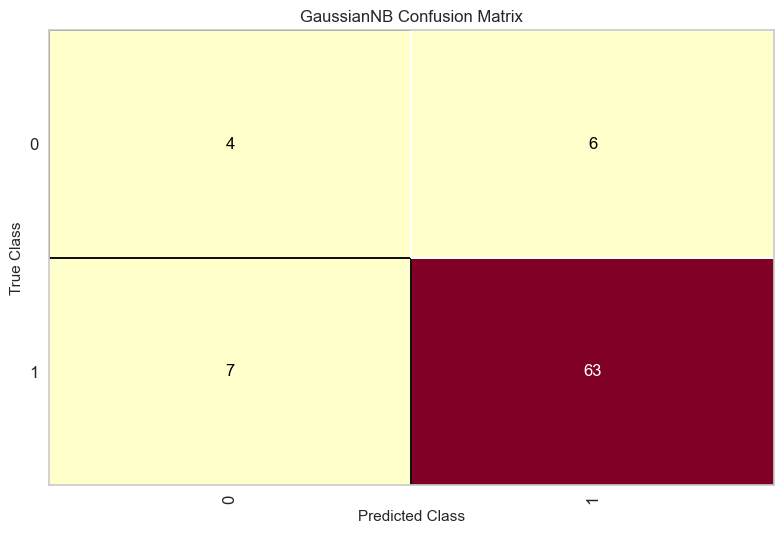

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

#### Criando o modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

#### Geração de previões
previsoes = naive_bayes.predict(X_test)
previsoes

#### Matriz de confusão
confusao = confusion_matrix(y_test, previsoes)
confusao

# Calculando a taxa de acerto e de erro
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

# Gerando gráfico da matrix de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()

Regressão Logística

In [18]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)
print("LR preductions: ", predictions_LR)
print("LR accuracy: ", 100*LR.score(X_test, y_test),"%")




C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR preductions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
LR accuracy:  90.0 %


Arvores de decisão

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier


# Criação do modelo
arvore = DecisionTreeClassifier()

# Treinamento do modelo
arvore.fit(X_train, y_train)

# Obtendo as previsões
previsoes = arvore.predict(X_test)
previsoes

# Confusion Matrix
confusao = confusion_matrix(y_test, previsoes)
confusao

# Calculando a taxa de acerto
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

# Calculando a taxa de erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.22499999999999998

Conclusão: